In [202]:
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import pandas as pd
import os


dataset_path = "D:/datasets/lisa"

In [203]:
anotations_dir = os.path.join(dataset_path, "Annotations", "Annotations")
weather_condition_folder_names = os.listdir(anotations_dir)

annotation_csv_paths = []
for folder_name in weather_condition_folder_names:
    folder_path = os.path.join(anotations_dir, folder_name)
    if os.path.isdir(folder_path):
        csv_file_path = os.path.join(folder_path, "frameAnnotationsBOX.csv")
        if os.path.exists(csv_file_path):
            annotation_csv_paths.append(csv_file_path)
        else:
            clip_names = os.listdir(folder_path)

            for clip_name in clip_names:
                
                clip_path = os.path.join(folder_path, clip_name)
                if os.path.isdir(clip_path):
                    csv_file_path = os.path.join(clip_path, "frameAnnotationsBOX.csv")
                    if os.path.exists(csv_file_path):
                        annotation_csv_paths.append(csv_file_path)

# for annotation_csv_path in annotation_csv_paths:
#     print(annotation_csv_path)
print(len(annotation_csv_paths))

22


In [204]:
# def get_image_path(row):
#     folder_name = row["folder_name"]
#     category_name = Path(folder_name).parts[0]
#     row["image_path"] = os.path.join(dataset_path, category_name, folder_name, "frames", row["Filename"])
    # return row


annotation_dataframes = []
for annotation_csv_path in annotation_csv_paths:
    df = pd.read_csv(annotation_csv_path, sep=";")
    df["folder_name"] = os.path.dirname(os.path.relpath(annotation_csv_path, anotations_dir))

    folder_name = os.path.dirname(os.path.relpath(annotation_csv_path, anotations_dir))
    df["folder_name"] = folder_name

    category_name = Path(folder_name).parts[0]

    df["Filename"] = df["Filename"].apply(os.path.basename)

    df["image_path"] = os.path.join(dataset_path, category_name, folder_name, "frames") + os.sep + df["Filename"]

    annotation_dataframes.append(df)

annotation_dataframe = annotation_dataframes[0]
for df in annotation_dataframes[1:]:
    annotation_dataframe = pd.concat([annotation_dataframe, df], ignore_index=True)

In [205]:
annotation_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109475 entries, 0 to 109474
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Filename                   109475 non-null  object
 1   Annotation tag             109475 non-null  object
 2   Upper left corner X        109475 non-null  int64 
 3   Upper left corner Y        109475 non-null  int64 
 4   Lower right corner X       109475 non-null  int64 
 5   Lower right corner Y       109475 non-null  int64 
 6   Origin file                109475 non-null  object
 7   Origin frame number        109475 non-null  int64 
 8   Origin track               109475 non-null  object
 9   Origin track frame number  109475 non-null  int64 
 10  folder_name                109475 non-null  object
 11  image_path                 109475 non-null  object
dtypes: int64(6), object(6)
memory usage: 10.0+ MB


In [206]:
annotation_dataframe["Annotation tag"].value_counts()

Annotation tag
go             46723
stop           44318
stopLeft       12734
warning         2669
goLeft          2476
warningLeft      350
goForward        205
Name: count, dtype: int64

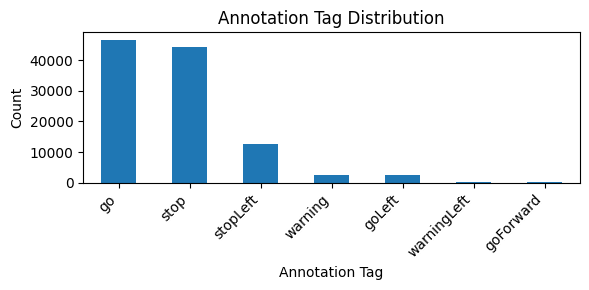

In [207]:
counts = annotation_dataframe["Annotation tag"].value_counts()

plt.figure(figsize=(6,3))
counts.plot(kind="bar")
plt.title("Annotation Tag Distribution")
plt.xlabel("Annotation Tag")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [208]:
annotation_dataframe["Annotation tag"] = annotation_dataframe["Annotation tag"].replace("stopLeft", "stop")
annotation_dataframe["Annotation tag"] = annotation_dataframe["Annotation tag"].replace("goLeft", "go")
annotation_dataframe["Annotation tag"] = annotation_dataframe["Annotation tag"].replace("warningLeft", "warning")
annotation_dataframe["Annotation tag"] = annotation_dataframe["Annotation tag"].replace("goForward", "go")
annotation_dataframe["Annotation tag"].value_counts()

Annotation tag
stop       57052
go         49404
warning     3019
Name: count, dtype: int64

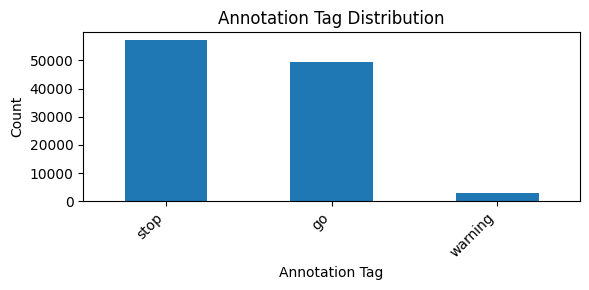

In [209]:
counts = annotation_dataframe["Annotation tag"].value_counts()

plt.figure(figsize=(6,3))
counts.plot(kind="bar")
plt.title("Annotation Tag Distribution")
plt.xlabel("Annotation Tag")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [210]:
annotation_dataframe["Filename"] = annotation_dataframe["Filename"].map(lambda x: os.path.basename(x))

annotation_dataframe["folder_name"]

0                  daySequence1
1                  daySequence1
2                  daySequence1
3                  daySequence1
4                  daySequence1
                  ...          
109470    nightTrain\nightClip5
109471    nightTrain\nightClip5
109472    nightTrain\nightClip5
109473    nightTrain\nightClip5
109474    nightTrain\nightClip5
Name: folder_name, Length: 109475, dtype: object

In [211]:
annotation_dataframe.iloc[0]["image_path"]

'D:/datasets/lisa\\daySequence1\\daySequence1\\frames\\daySequence1--00000.jpg'

In [212]:
row_id = 109470

folder_name = annotation_dataframe.iloc[row_id]["folder_name"]
category_name = Path(folder_name).parts[0]


image_path = os.path.join(dataset_path, category_name, folder_name, "frames", annotation_dataframe.iloc[row_id]["Filename"])

image_path

'D:/datasets/lisa\\nightTrain\\nightTrain\\nightClip5\\frames\\nightClip5--01450.jpg'

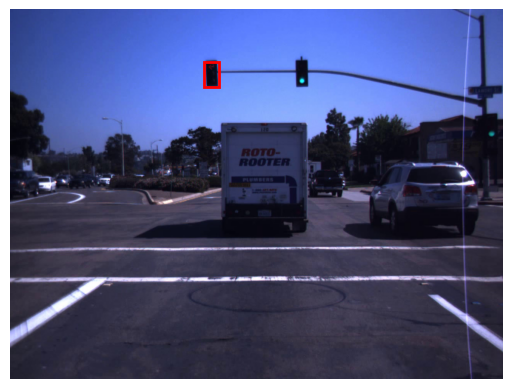

In [ ]:
row_to_draw = annotation_dataframe.iloc[10000]

img = Image.open(row_to_draw["image_path"])

x1 = row_to_draw["Upper left corner X"]
y1 = row_to_draw["Upper left corner Y"]
x2 = row_to_draw["Lower right corner X"]
y2 = row_to_draw["Lower right corner Y"]

width = x2 - x1
height = y2 - y1

fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')  # Hide axes

# Add the rectangle
rect = patches.Rectangle((x1, y1), width, height,
                         linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.show()

In [221]:
row_to_draw["Annotation tag"]

'stop'